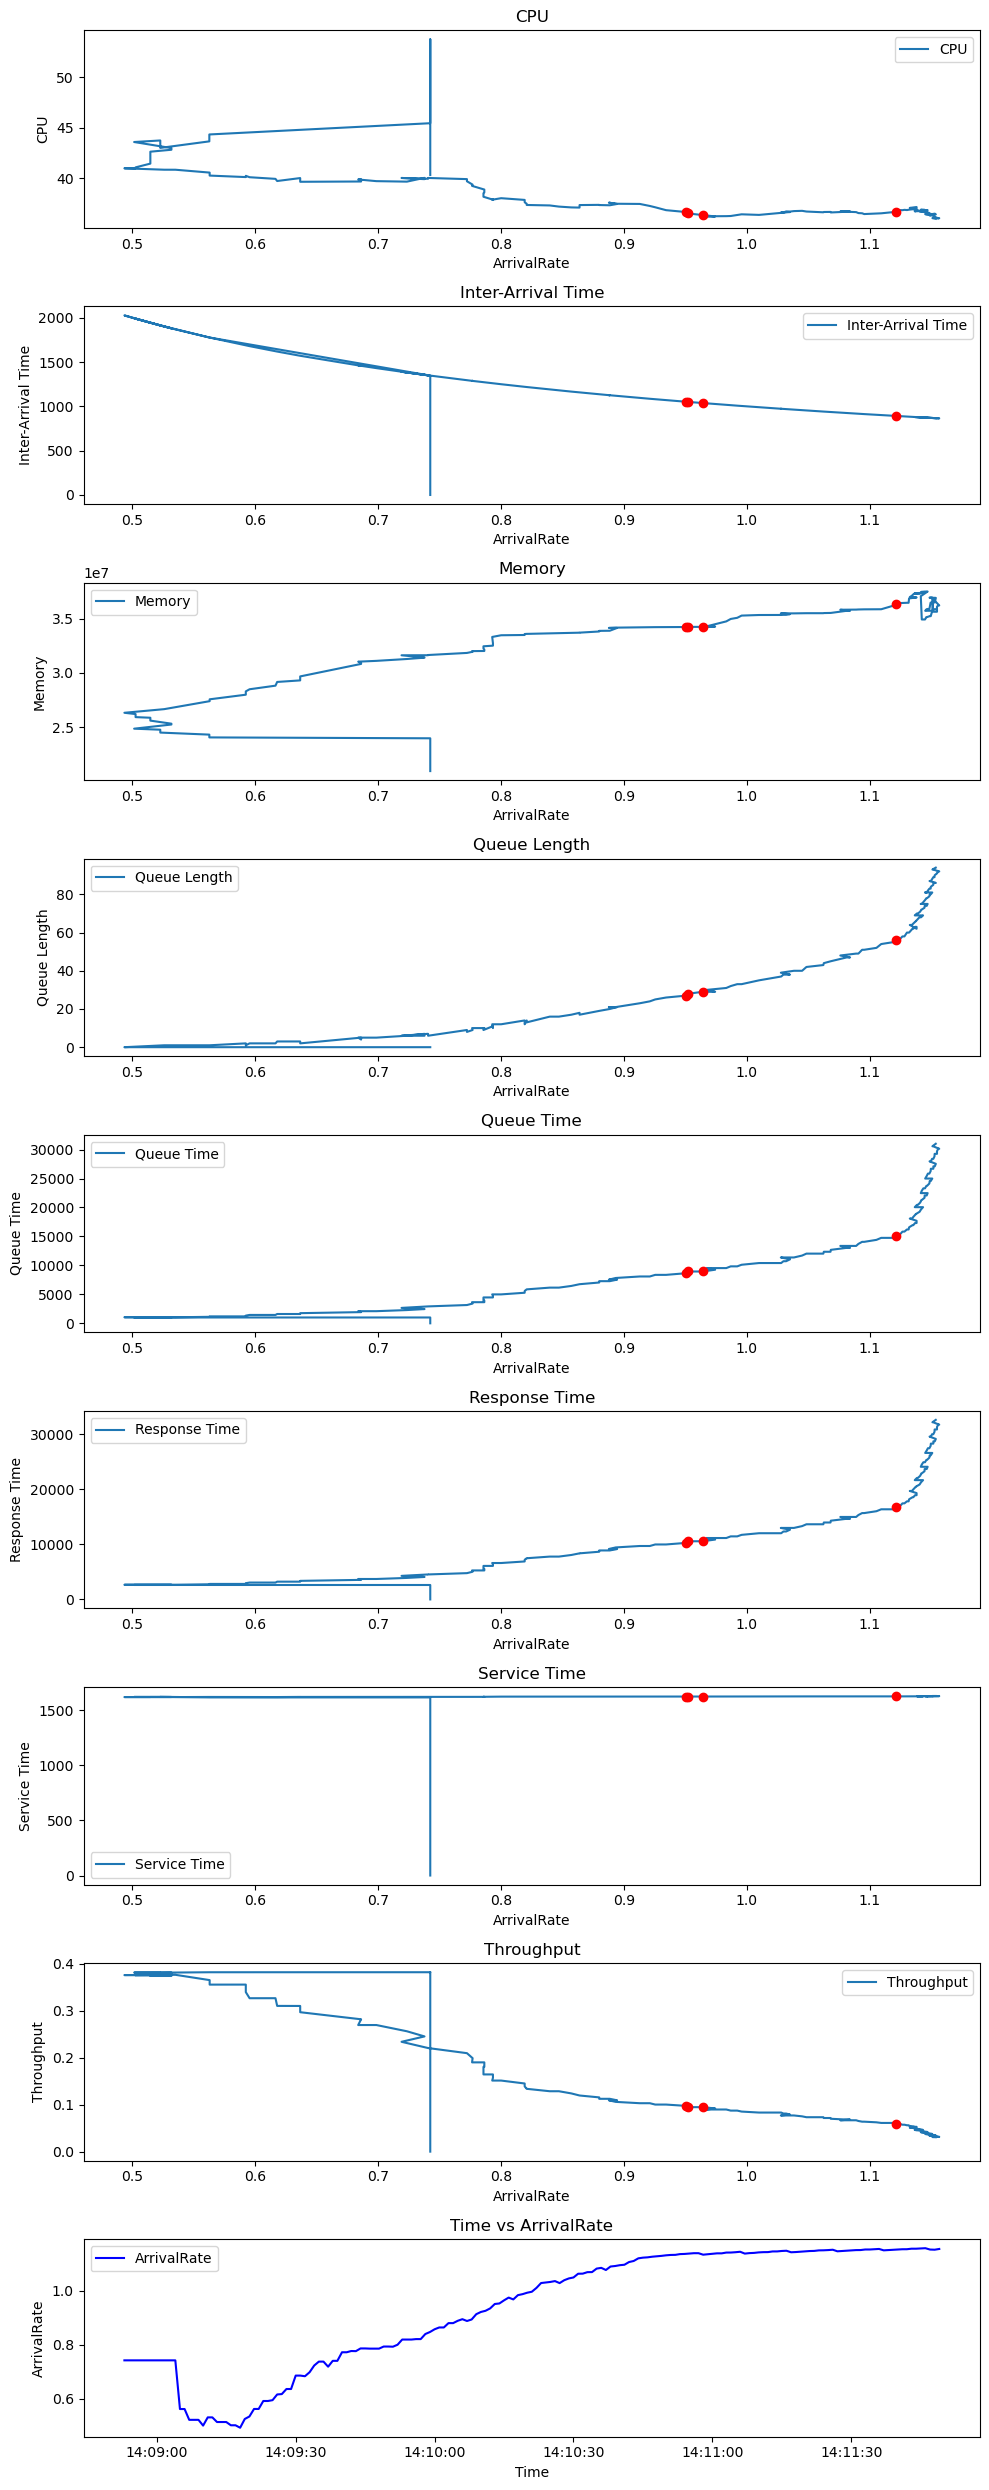

In [19]:
import pandas as pd
import json
import matplotlib.pyplot as plt

LOG_PATH = "C:\\Users\\CHAN\\Desktop\\wowsan\\log\\tickLogger\\89\\50002_tick.json"

# 데이터로드
df = pd.read_json(LOG_PATH, lines=True)

# 'time' 列을 datetime로 변환
df['time'] = pd.to_datetime(df['time'])

# 'Inter-Arrival Time'의 timedelta로 계산
interArrivalMs = pd.to_timedelta(df['Inter-Arrival Time'], unit='ms')


# 0으로 interArrivalMs를 변경
zero_indices = interArrivalMs == pd.to_timedelta(0, unit='ms')
for idx in zero_indices[zero_indices].index:
    next_non_zero = interArrivalMs[idx + 1:].loc[interArrivalMs[idx + 1:] != pd.to_timedelta(0, unit='ms')]
    if not next_non_zero.empty:
        interArrivalMs[idx] = next_non_zero.iloc[0]


# ArrivalRate로 계산
df['ArrivalRate'] = 1 / interArrivalMs.dt.total_seconds()


# 'ArrivalRate'을 인덱스로 설정
df.set_index('ArrivalRate', inplace=True)


# 또한 특성 선택
keys = ['CPU', 'Inter-Arrival Time', 'Memory', 'Queue Length', 'Queue Time', 'Response Time', 'Service Time', 'Throughput']


# 그래프 생성, 시간과 ArrivalRate 그래프를 추가
fig, ax = plt.subplots(len(keys) + 1, 1, figsize=(10, 25))


# 그래프에 특성 삽입
for i, key in enumerate(keys):
    ax[i].plot(df.index, df[key], label=key)
    ax[i].set_title(key)
    ax[i].set_xlabel('ArrivalRate')
    ax[i].set_ylabel(key)
    ax[i].legend()

    bottleneck_true = df[df['Bottleneck'] == True]
    ax[i].scatter(bottleneck_true.index, bottleneck_true[key], color='red', label='Bottleneck True', zorder=3)

# time와 ArrivalRate의 관계를 그래프에 특성 삽입
ax[len(keys)].plot(df['time'], df.index, label='ArrivalRate', color='blue')
ax[len(keys)].set_title('Time vs ArrivalRate')
ax[len(keys)].set_xlabel('Time')
ax[len(keys)].set_ylabel('ArrivalRate')
ax[len(keys)].legend()


# 그레이프의 그레이프 특성 변경
plt.tight_layout()
plt.show()
